In [11]:
import sys
import os

# Add the absolute path of the 'backend' folder
current_dir = os.path.dirname(os.path.abspath("__file__"))
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(parent_dir)

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import pandas as pd
import joblib
from model.SimpleLinearRegression import SimpleLinearRegression
import matplotlib.pyplot as plt

In [14]:
df1 = pd.read_excel('../data/DataSets_01.xlsx')
df2 = pd.read_excel('../data/Prix-Moyen-Au-m²-Algerie.xlsx')

In [15]:
#les erreurs par NaN
df1['Superficie'] = pd.to_numeric(df1['Superficie'], errors='coerce')
df1['Prix '] = pd.to_numeric(df1['Prix '], errors='coerce')
df2['Superficie'] = pd.to_numeric(df2['Superficie'], errors='coerce')
df2['Prix '] = pd.to_numeric(df2['Prix '], errors='coerce')

df1.dropna(subset=['Superficie', 'Prix '], inplace=True)
df2.dropna(subset=['Superficie', 'Prix '], inplace=True)

non_numeric_rows_df1 = df1[df1['Prix '].isna()]
non_numeric_rows_df2 = df2[df2['Prix '].isna()]

In [17]:
# Combiner les deux datasets
combined_df = pd.concat([df1, df2])

print(combined_df.head())
print(f'Taille du dataset combiné: {len(combined_df)}')

X = combined_df[['Superficie']].values
y = combined_df['Prix '].values

combined_df.to_excel('../data/Combined_DataSets.xlsx', index=False)

        Prix   Superficie
0  30031944.0       167.0
1  94014480.0       336.0
2  14582208.0        64.0
3  13136742.0        83.0
4  42796257.0       203.0
Taille du dataset combiné: 7699


In [20]:
# Diviser les données en ensembles d'entraînement et de test (70% entraînement, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1.0)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='r2')

# Afficher les résultats de la validation croisée
print(f"Validation Croisée k-fold (5 folds): {cv_scores}")
print(f"Score moyen de validation croisée: {cv_scores.mean()}")

Validation Croisée k-fold (5 folds): [0.57571911 0.59794264 0.58387159 0.59271205 0.60626724]
Score moyen de validation croisée: 0.591302527920291


In [21]:
# Initialiser et entraîner le modèle en utilisant la descente de gradient
model = SimpleLinearRegression()
model.fit(X_train, y_train, max_steps=10000, learning_rate=0.001)

Step 0: Cost = 0.998816632420006
Step 100: Cost = 0.8916750115084189
Step 200: Cost = 0.8039636489607024
Step 300: Cost = 0.7321588446790375
Step 400: Cost = 0.6733759257029084
Step 500: Cost = 0.6252533578897627
Step 600: Cost = 0.5858578740780294
Step 700: Cost = 0.5536068073688039
Step 800: Cost = 0.5272045093578632
Step 900: Cost = 0.5055902989956591
Step 1000: Cost = 0.48789585098253385
Step 1100: Cost = 0.4734103118283221
Step 1200: Cost = 0.46155174215535527
Step 1300: Cost = 0.45184373797329164
Step 1400: Cost = 0.44389629171307315
Step 1500: Cost = 0.4373901241348007
Step 1600: Cost = 0.4320638576624548
Step 1700: Cost = 0.4277035158493797
Step 1800: Cost = 0.4241339271279772
Step 1900: Cost = 0.4212116874994815
Step 2000: Cost = 0.4188193994481569
Step 2100: Cost = 0.41686095563516407
Step 2200: Cost = 0.41525767790005846
Step 2300: Cost = 0.4139451564588854
Step 2400: Cost = 0.4128706623174026
Step 2500: Cost = 0.4119910289461974
Step 2600: Cost = 0.4112709181164876
Step 270

In [22]:
# Afficher les paramètres du modèle
print(f"Using Gradient Descent:")
print(f"Slope (b1): {model.slope}")
print(f"Intercept (b0): {model.intercept}")

# Évaluer le modèle
r2_score = model.score(X_test, y_test)
print(f"R-squared: {r2_score}")

Using Gradient Descent:
Slope (b1): 234579.36478117792
Intercept (b0): -2614296.097272612
R-squared: 0.606173891012666


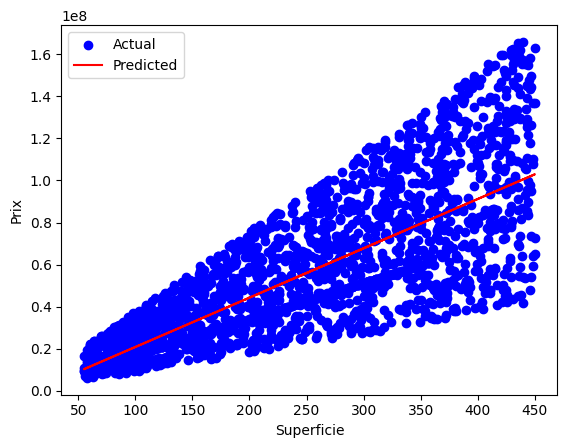

In [23]:
# Optionnel: Visualisation des résultats
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, model.predict(X_test), color='red', label='Predicted')
plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.legend()
plt.show()

In [24]:
# Sauvegarder le modèle entraîné
joblib.dump(model, 'simple_linear_regression_model.pkl')

['simple_linear_regression_model.pkl']

In [25]:
def predict_price(superficie):
    predicted_price = model.predict([superficie])[0]
    return predicted_price

In [29]:
superficie = 20
prix_predicted = predict_price(superficie)
print(f"Le prix prédit pour une superficie de {superficie} m² est : {prix_predicted} DZD")

Le prix prédit pour une superficie de 20 m² est : 2077291.1983509464 DZD
